Import custom tracking functions and useful libraries

In [4]:
from tracking_library import *

Set up plotting

In [5]:
%matplotlib inline
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

/tmp/vtsianti/ipykernel_21126/4291944555.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


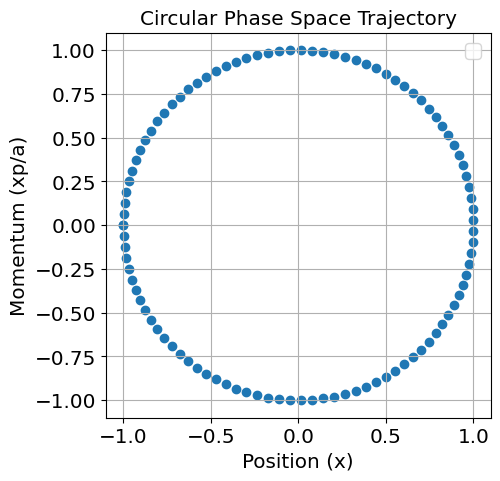

In [42]:
#undisturbed motion for a single particle


ampl=1
Q=10
R=5
a=Q/R
m0=3*np.pi/2
s = np.linspace(0, np.pi*2, 100)


x=ampl*(np.sin((a*s)+m0))
xp=ampl*a*(np.cos((a*s)+m0))

plt.scatter(x,xp/a)

plt.xlabel('Position (x)')
plt.ylabel('Momentum (xp/a)')
plt.title('Circular Phase Space Trajectory')
plt.legend()

# Show grid and equal aspect ratio
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# Display the plot
plt.show()

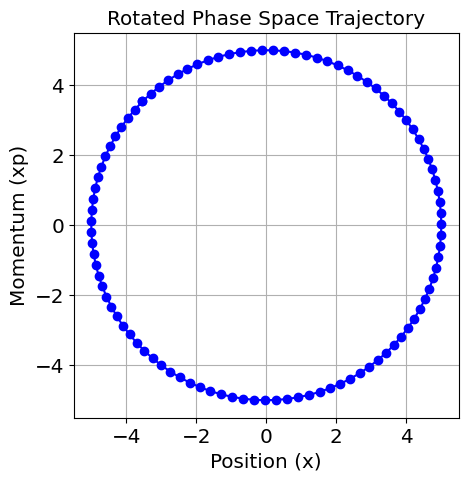

In [43]:
x_rotated = np.zeros_like(s)
xp_rotated = np.zeros_like(s)

m0=np.pi/4
a = 1  # Example value for `a`
s = np.linspace(0, np.pi*2 , 100)
x = 0 # initial position
xp = 5 # initial angle
X_0 = np.array([x, xp])

for i in range(len(s)):
    angle = a * s[i]
    M = np.array([[np.cos(angle+m0), -np.sin(angle+m0)],
                  [np.sin(angle+m0), np.cos(angle+m0)]])

    X_fin=M@X_0
    x_rotated[i] =X_fin[0]
    xp_rotated[i] = X_fin[1]
plt.plot(x_rotated,xp_rotated/a, 'o-b')
plt.xlabel('Position (x)')
plt.ylabel('Momentum (xp)')
plt.title('Rotated Phase Space Trajectory')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

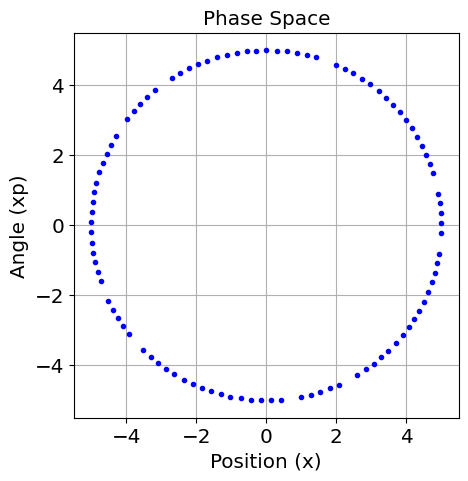

In [44]:
num_turns=100

x_rotated  = np.zeros(num_turns)
xp_rotated = np.zeros(num_turns)


angle = 0.211*np.pi*2

x = 0 # initial position
xp = 5 # initial angle
X_0 = np.array([[x], [xp]])
M = np.array([[np.cos(angle), -np.sin(angle)],
            [np.sin(angle), np.cos(angle)]])
X_fin=X_0
for turns in range(num_turns):
    x_rotated[turns]  = X_fin[0,0]
    xp_rotated[turns] = X_fin[1,0]
    X_fin=M@X_fin
plt.plot(x_rotated,xp_rotated, '.b')
plt.xlabel('Position (x)')
plt.ylabel('Angle (xp)')
plt.title('Phase Space')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

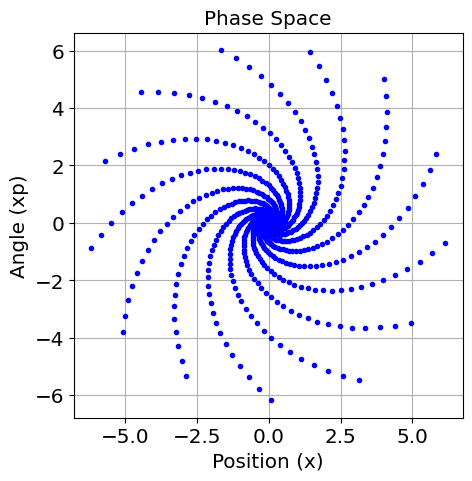

In [45]:
num_turns=1000
gain=0.01
x_rotated  = np.zeros(num_turns)
xp_rotated = np.zeros(num_turns)


phase_advance = 0.23*np.pi*2

x = 4 # initial position
xp = 5 # initial angle
X_0 = np.array([[x], [xp]])
M = np.array([[np.cos(phase_advance), -np.sin(phase_advance)],
            [np.sin(phase_advance), np.cos(phase_advance)]])
X_fin=X_0
for turns in range(num_turns):
    x_rotated[turns]  = X_fin[0,0]
    xp_rotated[turns] = X_fin[1,0]
    measured_position = X_fin[0, 0]
    X_fin = M @ X_fin
    X_fin[1, 0] -= gain*measured_position
plt.plot(x_rotated,xp_rotated, '.b')
plt.xlabel('Position (x)')
plt.ylabel('Angle (xp)')
plt.title('Phase Space')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Text(0, 0.5, 'position[mm]')

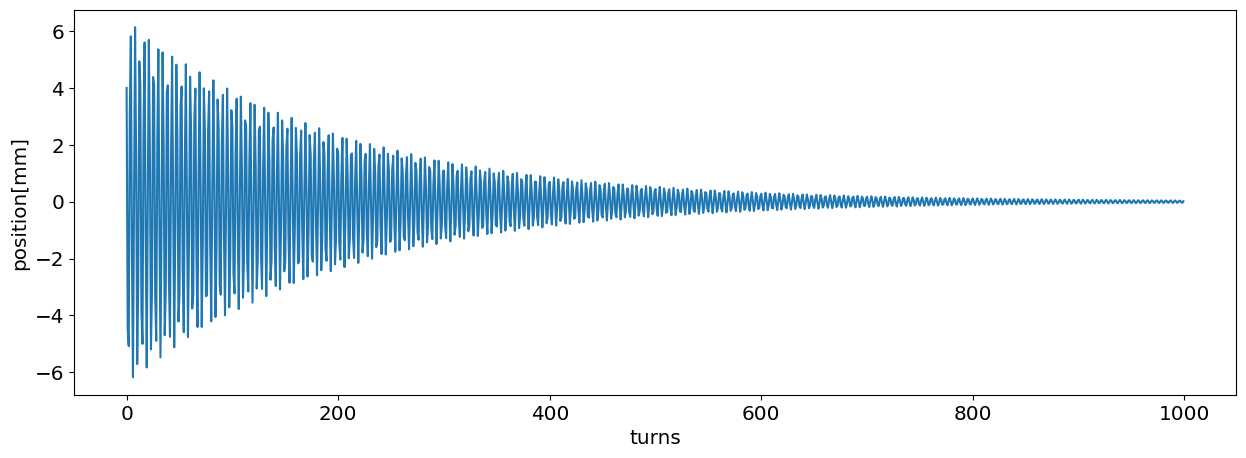

In [46]:
pa=np.zeros(num_turns)
for turns in range(num_turns):
    pa[turns]=phase_advance*turns
plt.plot(pa/phase_advance,x_rotated)
plt.xlabel('turns')
plt.ylabel('position[mm]')

Text(0, 0.5, 'position[mm]')

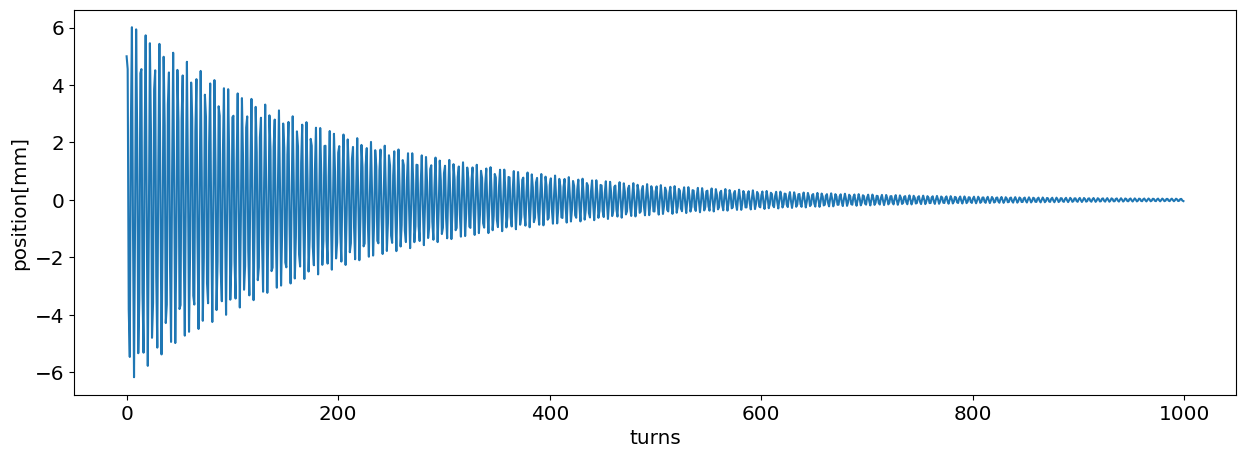

In [47]:
phase_advance_tot=np.zeros(num_turns)
for turns in range(num_turns):
    phase_advance_tot[turns]=phase_advance*turns
plt.plot(phase_advance_tot/phase_advance,xp_rotated)
plt.xlabel('turns')
plt.ylabel('position[mm]')

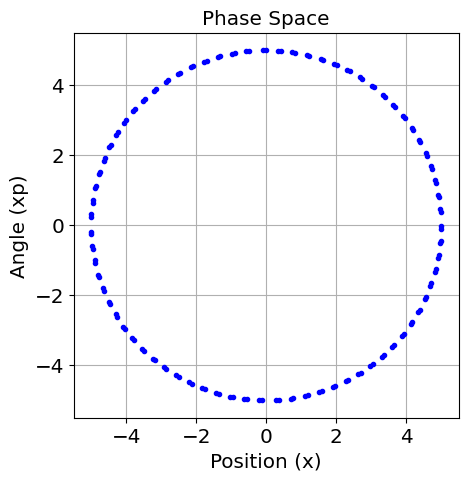

In [48]:
#machine split
num_turns=150

x_rotated  = np.zeros(num_turns)
xp_rotated = np.zeros(num_turns)


total_angle = 0.9956*np.pi*3/2
position_angle=np.pi/2

x = 0 # initial position
xp = 5 # initial angle
X_0 = np.array([[x], [xp]])
Mpos = np.array([[np.cos(position_angle), -np.sin(position_angle)],
            [np.sin(position_angle), np.cos(position_angle)]])
Mrem=np.array([[np.cos(total_angle-position_angle), -np.sin(total_angle-position_angle)],
            [np.sin(total_angle-position_angle), np.cos(total_angle-position_angle)]])
X_fin=X_0
for turns in range(num_turns):
    x_rotated[turns]  = X_fin[0,0]
    xp_rotated[turns] = X_fin[1,0]
    X_fin=Mrem@Mpos@X_fin
plt.plot(x_rotated,xp_rotated, '.b')
plt.xlabel('Position (x)')
plt.ylabel('Angle (xp)')
plt.title('Phase Space')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


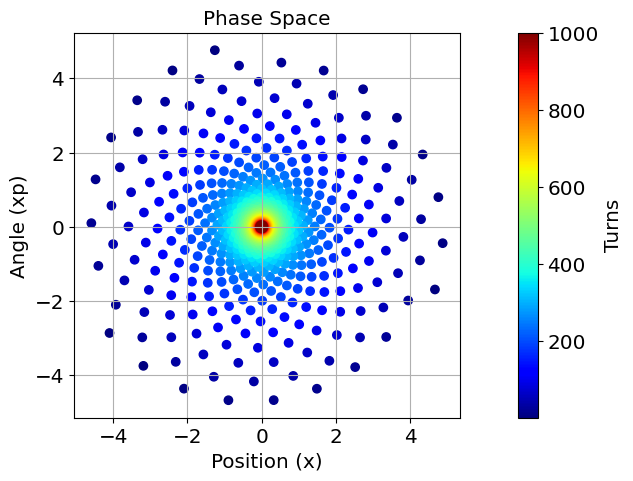

In [49]:
#machine split
num_turns=1000
gain=0.01
x_rotated  = np.zeros(num_turns)
xp_rotated = np.zeros(num_turns)


total_angle = 1.796*np.pi*3/2
position_angle=np.pi/2

x = 0 # initial position
xp = 5 # initial angle
X_0 = np.array([[x], [xp]])
Mkick = np.array([[np.cos(position_angle), -np.sin(position_angle)],
            [np.sin(position_angle), np.cos(position_angle)]])
Mremain=np.array([[np.cos(total_angle-position_angle), -np.sin(total_angle-position_angle)],
            [np.sin(total_angle-position_angle), np.cos(total_angle-position_angle)]])
X_fin=X_0
X_fin2=0
pickup_measure=0
for turns in range(num_turns):

    pickup_measure=X_fin[0,0]
    X_fin2=Mkick@X_fin
    X_fin2[1, 0] -= gain*pickup_measure
    X_fin=Mremain@X_fin2
    x_rotated[turns]  = X_fin[0,0]
    xp_rotated[turns] = X_fin[1,0]

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','orange', 'purple', 'pink']  
#for i in range(0, len(x_rotated), 100):
 #   plt.scatter(x_rotated[i:i+100], xp_rotated[i:i+100], color=colors[i // 100 % len(colors)])
num_turn2=np.arange(1,1001)
plt.scatter(x_rotated, xp_rotated, c=num_turn2,cmap='jet')
cb = plt.colorbar()
cb.set_label('Turns')

#plt.plot(x_rotated,xp_rotated, '.b', c=)

plt.xlabel('Position (x)')
plt.ylabel('Angle (xp)')
plt.title('Phase Space')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

/tmp/vtsianti/ipykernel_21126/4147576174.py:4: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)


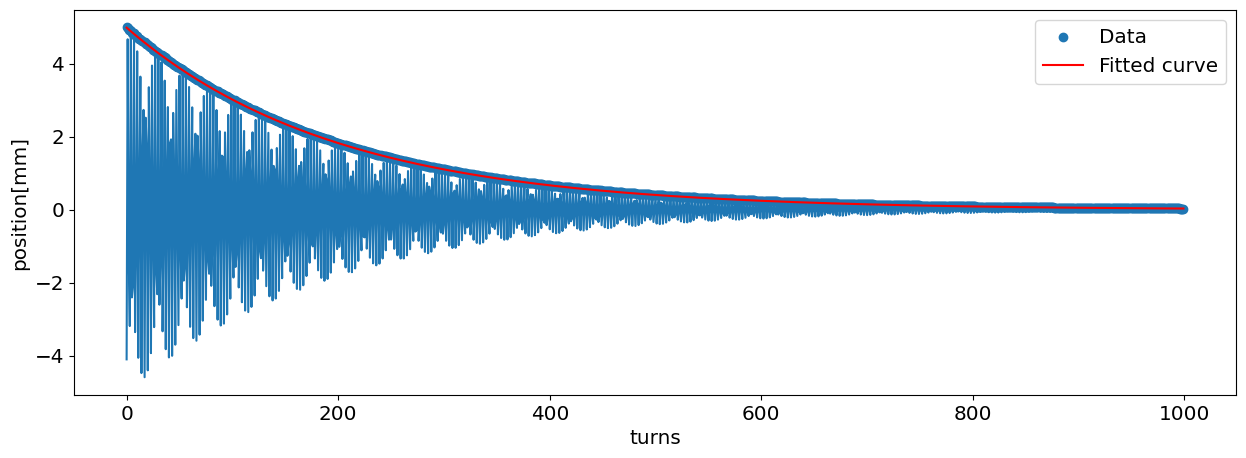

Fitted parameters: [4.98769054 0.00502536]


In [50]:
from scipy.optimize import curve_fit

def exponential(x, a, b):
    return a * np.exp(-b * x)


radius=np.sqrt((xp_rotated)**2+(x_rotated)**2)
pa=np.zeros(num_turns)
for turns in range(num_turns):
    pa[turns]=total_angle*turns
plt.plot(pa/total_angle, x_rotated)    
plt.xlabel('turns')
plt.ylabel('position[mm]')


radius=np.sqrt((xp_rotated)**2+(x_rotated)**2)
xpos = x_rotated
params, covariance = curve_fit(exponential, pa/total_angle, radius)

plt.scatter(pa/total_angle, radius, label='Data')
plt.plot(pa/total_angle, exponential(pa/total_angle, *params), label='Fitted curve', color='red')
#plt.plot(pa/total_angle, exponential(pa/total_angle, 5,5e-3), label='Guess curve', color='green')
plt.legend()
plt.show()
print("Fitted parameters:", params)

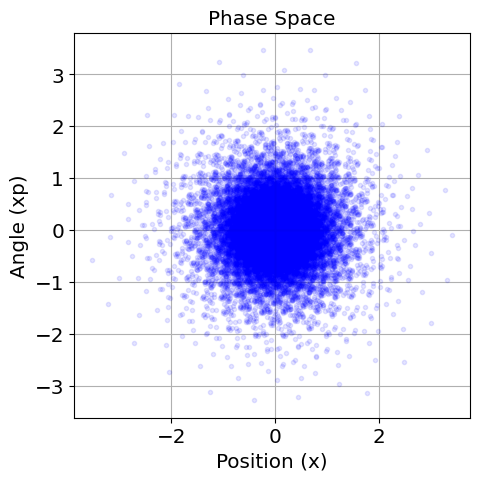

In [51]:
#machine split
num_turns=1000
gain=0.01
N_particles=100
x_rotated  = np.zeros((num_turns, N_particles))
xp_rotated = np.zeros((num_turns, N_particles))


total_angle = 1.796*np.pi*3/2
position_angle=np.pi/2

x = np.random.randn(N_particles)
xp = np.random.randn(N_particles) 

X_0 = np.array([x, xp])
Mkick = np.array([[np.cos(position_angle), -np.sin(position_angle)],
            [np.sin(position_angle), np.cos(position_angle)]])
Mremain=np.array([[np.cos(total_angle-position_angle), -np.sin(total_angle-position_angle)],
            [np.sin(total_angle-position_angle), np.cos(total_angle-position_angle)]])
X_fin=X_0

pickup_measure=0
for turns in range(num_turns):

    pickup_measure=X_fin[0,:]
    X_fin2=Mkick@X_fin
    X_fin2[1, :] -= gain*pickup_measure[:]
    X_fin=Mremain@X_fin2
    x_rotated[turns]  = X_fin[0,:]
    xp_rotated[turns] = X_fin[1,:]
    
plt.plot(x_rotated,xp_rotated, '.b', alpha = 0.1)
plt.xlabel('Position (x)')
plt.ylabel('Angle (xp)')
plt.title('Phase Space')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Text(0, 0.5, 'position[mm]')

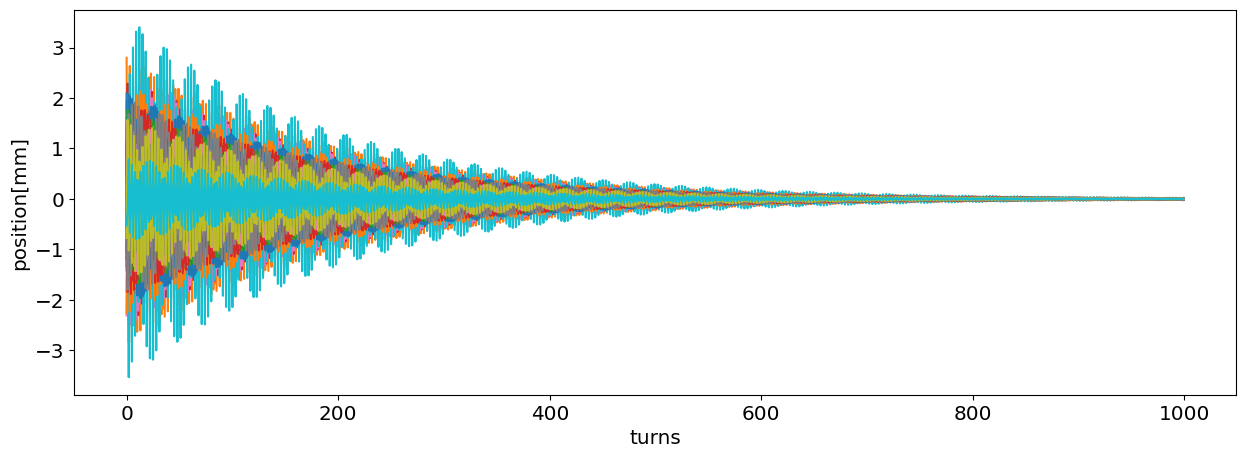

In [52]:
pa=np.zeros(num_turns)
for turns in range(num_turns):
    pa[turns]=total_angle*turns
plt.plot(pa/total_angle,x_rotated)
plt.xlabel('turns')
plt.ylabel('position[mm]')

In [53]:
#machine split
num_turns=1000 #number of turns the particles are doing
gain=0.001 #gain of the kick
N_particles=1000 # number of particles in the beam
W=20*10**8 #Hz, the bandwidth of the system
Trev=5e-07   #time of revolution 0.5 microseconds
N_part_sampl=N_particles/(2*W*Trev)#number of particles/sample
number_of_samples=N_particles/N_part_sampl  #number of samples
number_of_samples=int(number_of_samples)
Ts=Trev/number_of_samples  
Ns=int(N_part_sampl)
print(Ns)
x_final  = np.zeros((num_turns, N_particles))
xp_final = np.zeros((num_turns, N_particles))
x_temp=np.zeros((number_of_samples,Ns))
xp_temp=np.zeros((number_of_samples,Ns))
noise_mean = 0  # Mean of the noise
noise_stddev = 0.1  # Standard deviation of the noise (adjust as needed)
noise = np.random.normal(noise_mean, noise_stddev)



total_angle = 1.796*np.pi*3/2 #phase advance of the machine
position_angle=np.pi/2   #split the PU,K with a phase advance 90 degrees

x = np.random.randn(N_particles)
xp = np.random.randn(N_particles)
emmitance_rms_initial=(np.mean(x**2)+np.mean(xp**2))
X_0 = np.array([x, xp])
samples = [X_0[:, i*Ns:(i+1)*Ns] for i in range(number_of_samples)]  #creating samples
print(len(samples[0][0]))
print(f'Beam mean  x [mm]: {np.mean(X_0[0,:])}')
print(f"Beam mean  x' [mrad]: {np.mean(X_0[1,:])}")
print(f'Beam rms size [mm]: {np.std(X_0[0,:])}')
print(f"Beam rms divergence [mrad]: {np.std(X_0[1,:])}")
Mkick = np.array([[np.cos(position_angle), -np.sin(position_angle)],
            [np.sin(position_angle), np.cos(position_angle)]])
Mremain=np.array([[np.cos(total_angle-position_angle), -np.sin(total_angle-position_angle)],
            [np.sin(total_angle-position_angle), np.cos(total_angle-position_angle)]])

emmitance_rms_final=np.zeros(num_turns)   
emmitance_rms_final[0]=emmitance_rms_initial
pickup_measure=np.zeros(number_of_samples)
measured_value_with_noise=np.zeros(number_of_samples)
for turns in range(num_turns):
    for N in range(number_of_samples):
        pickup_measure[N]=np.mean(samples[N][0,:])
        noise_tot=np.zeros(number_of_samples)   #pick up measurement, it measures the average sample error
        X_fin2=Mkick@samples[N]

        noise_tot[N]=noise
        #measured_value_with_noise[N] = pickup_measure[N] #+noise
        X_fin2[1, :] -= gain*pickup_measure[N]    #kick on the kicker,based on the previous measurement
        X_fin=Mremain@X_fin2
        x_temp[N]  = X_fin[0,:]
        xp_temp[N] = X_fin[1,:]
        samples[N]=X_fin    #changing the position and momentum of the samples

    #we flatten the arrays, so we can use them properly!!!    
    x_temp_flat=x_temp.flatten() 
    xp_temp_flat=xp_temp.flatten()   
    #here we keep the x,xp from all the particles
    
    #x_final[turns]=x_temp_flat
    #xp_final[turns]=xp_temp_flat
    if(turns+1!=num_turns):
      emmitance_rms_final[turns+1]=(np.mean(x_final[turns]**2))+(np.mean(xp_final[turns]**2))
    #here we rerandomize the samples, it is important for mixing!!
    indices = np.arange(x_temp_flat.size)
    np.random.shuffle(indices)
    x_shuffled =x_temp_flat[indices].reshape(x_temp.shape)
    xp_shuffled = xp_temp_flat[indices].reshape(xp_temp.shape)
    samples = np.array(samples)
    samples[:, 0, :]=x_temp[:,:]
    samples[:, 1, :]=xp_temp[:,:]



   

print(f'the initial emmitance is {emmitance_rms_initial}{chr(0x03C0)} ')
print(f'the final emmitance after cooling is {emmitance_rms_final[-1]}{chr(0x03C0)}')
print(f'Is emmitance reduced??  -->  ', emmitance_rms_final[-1]<emmitance_rms_initial )
print(f"Emmitance is reduced by {(emmitance_rms_initial-emmitance_rms_final[-1])*100/emmitance_rms_initial}%") 
x_final_flat = x_final.flatten()
xp_final_flat = xp_final.flatten()   
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the histogram for noise_tot on the first subplot
ax1.hist(noise_tot, bins=30, color='blue', alpha=0.7)
ax1.set_title('Histogram of Noise Tot')
ax1.set_xlabel('Noise Value')
ax1.set_ylabel('Frequency')

# Plot the histogram for pickup_measure on the second subplot
ax2.hist(pickup_measure, bins=30, color='green', alpha=0.7)
ax2.set_title('Histogram of Pickup Measure')
ax2.set_xlabel('Pickup Measure Value')
ax2.set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()



0
0
Beam mean  x [mm]: -0.025176948189538736
Beam mean  x' [mrad]: -0.04537658275108455
Beam rms size [mm]: 1.0385889070613503
Beam rms divergence [mrad]: 0.9932616728962261


/home/vtsianti/2409/Tutorial/miniforge/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/vtsianti/2409/Tutorial/miniforge/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


KeyboardInterrupt: 

Text(0, 0.5, 'emmitance')

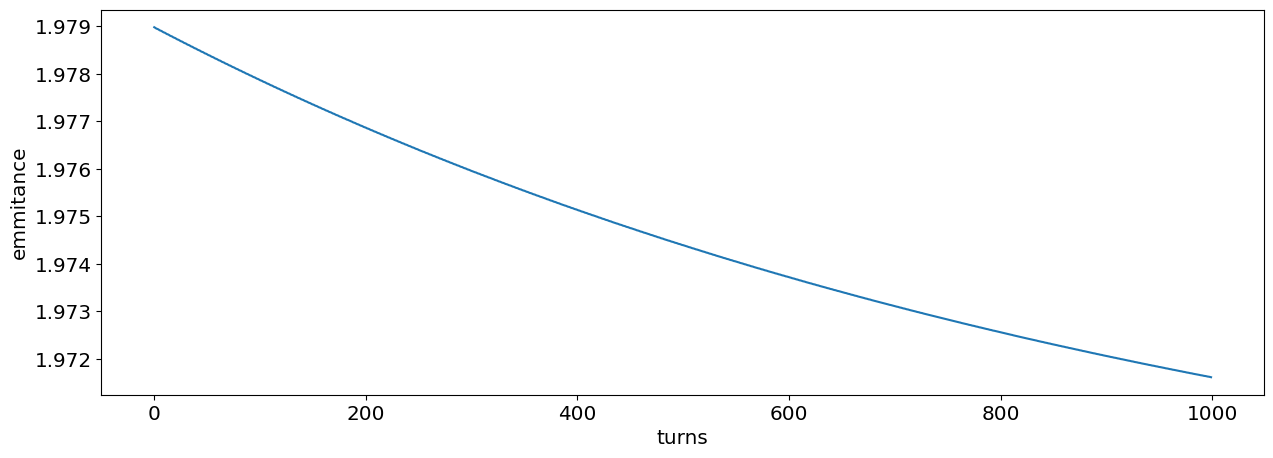

In [455]:
pa=np.zeros(num_turns)
for turns in range(num_turns):
    pa[turns]=total_angle*turns
plt.plot(pa/total_angle,emmitance_rms_final)
plt.xlabel('turns')
plt.ylabel('emmitance')


In [6]:
def Stochastic_cooling(num_turns, gain, N_particles, W, Trev, noise_std, total_angle, position_angle):
 


#this is a very simplistic model of stochastic cooling, using one pickup and one kicker on a ring with no elements!! The initial position of the particles are randomized... We include some kind of mixing and noise as well!!
#In the end we print the emmitance inital and final and the phase space of the particles as they cooled.

#num_turns=number of turns the beam does in the machine
#gain=the gain on the kicker, how strong will the kick be
#N_particles=number of particles in the beam
#W=bandwidth of the amplifier
#Trev=time needed for a complete revolution of the beam to the machine
#noise=defines the electronic noise
#total_angle=phase advance of the machine
#position_angle=phase advance between the pickup and the kicker
 from scipy.optimize import curve_fit

 def exponential_fit(x, a, b):
    return a * np.exp(b * x)

 N_part_sampl=N_particles/(2*W*Trev)#number of particles/sample
 number_of_samples=N_particles/N_part_sampl  #number of samples
 number_of_samples=int(number_of_samples)
 Ts=Trev/number_of_samples  
 Ns=int(N_part_sampl)
 x_final  = np.zeros((num_turns, N_particles))
 xp_final = np.zeros((num_turns, N_particles))
 x_temp=np.zeros((number_of_samples,Ns))
 xp_temp=np.zeros((number_of_samples,Ns))
 noise = np.random.normal(0, noise_std)

 noise_keep=np.zeros((num_turns,number_of_samples))
 measurement_keep=np.zeros((num_turns,number_of_samples))

 x = np.random.normal(0,1,N_particles)
 xp = np.random.normal(0,1,N_particles)
 emmitance_rms_initial=(np.mean(x**2)+np.mean(xp**2))/2  #initial emmitance
 X_0 = np.array([x, xp])  #initial beam's coordinates
 samples = [X_0[:, i*Ns:(i+1)*Ns] for i in range(number_of_samples)]  #creating samples
 
 print(f'Beam mean  x [mm]: {np.mean(X_0[0,:])}')
 print(f"Beam mean  x' [mrad]: {np.mean(X_0[1,:])}")
 print(f'Beam rms size [mm]: {np.std(X_0[0,:])}')
 print(f"Beam rms divergence [mrad]: {np.std(X_0[1,:])}")
 Mkick = np.array([[np.cos(position_angle), -np.sin(position_angle)],   #defining the machine
            [np.sin(position_angle), np.cos(position_angle)]])
 Mremain=np.array([[np.cos(total_angle-position_angle), -np.sin(total_angle-position_angle)],
            [np.sin(total_angle-position_angle), np.cos(total_angle-position_angle)]])

 
 pickup_measure=np.zeros(number_of_samples)
 measured_value_with_noise=np.zeros(number_of_samples)
 for turns in range(num_turns):
     for N in range(number_of_samples):
        noise = np.random.normal(0, noise_std)
        pickup_measure[N]=np.mean(samples[N][0,:]) + noise #pick up measurement, it measures the average sample error
        noise_keep[turns][N]=noise
        X_fin2=Mkick@(samples[N])
        measured_value_with_noise[N] = pickup_measure[N]  #pickup measurement disturbed by the noise
        measurement_keep[turns][N] = measured_value_with_noise[N]
        X_fin2[1, :] -= gain*measured_value_with_noise[N]    #kick on the kicker,based on the previous measurement
        X_fin=Mremain@X_fin2
        x_temp[N]  = X_fin[0,:]
        xp_temp[N] = X_fin[1,:]
        samples[N]=X_fin    #changing the position and momentum of the samples
        
    #we flatten the arrays, so we can use them properly!!!    
     x_temp_flat=x_temp.flatten() 
     xp_temp_flat=xp_temp.flatten()   
    #here we keep the x,xp from all the particles
     
     x_final[turns]=x_temp_flat
     xp_final[turns]=xp_temp_flat

    #here we rerandomize the samples, it is important for mixing!!
     indices = np.arange(x_temp_flat.size)
     np.random.shuffle(indices)
     x_shuffled =x_temp_flat[indices].reshape(x_temp.shape)
     xp_shuffled = xp_temp_flat[indices].reshape(xp_temp.shape)
     samples = np.array(samples)
     samples[:, 0, :]=x_shuffled[:,:]
     samples[:, 1,:]=xp_shuffled[:,:]

 emmitance_rms_final=np.zeros(num_turns+1)
 emmitance_rms_final[0]=emmitance_rms_initial
 for turns in range(num_turns):
   emmitance_rms_final[turns+1]=((np.mean(x_final[turns]**2))+(np.mean(xp_final[turns]**2)))/2



 emittance_eq=(gain*Ns*(noise_std**2))/(1-(gain/2))/2
 print(f'equilibrium emmitance is: {emittance_eq}{chr(0x03C0)} mm*mrad')
 tc=Ns*Trev/(gain-((gain**2)/2))
 print(f'Time of cooling is:{tc} seconds')
 values_of_func=np.zeros(num_turns+1)
 for turns in range(num_turns+1):

   values_of_func[turns]=emittance_eq+((emmitance_rms_initial-emittance_eq)*np.exp(-turns*Trev/tc))  

 
 print(f'gain is  ' ,gain)
#Below are the results
 print(f"number of samples are  {len(samples)}")
 print(f'the initial emmitance is {emmitance_rms_initial}{chr(0x03C0)} mm*mrad')
 print(f'the final emmitance after cooling is {emmitance_rms_final[-1]}{chr(0x03C0)} mm*mrad')
 print(f'Is emmitance reduced??  -->  ', emmitance_rms_final[-1]<emmitance_rms_initial )
 if (emmitance_rms_final[-1]<emmitance_rms_initial):
    print(f"Emitance is reduced by {(emmitance_rms_initial-emmitance_rms_final[-1])*100/emmitance_rms_initial}%")
 fit_turns = np.arange(100)
 fit_emittance = emmitance_rms_final[:100]    
 fit2_turns = np.arange(301)
 fit2_emittance = emmitance_rms_final[:301]  
 slope, intercept = np.polyfit(fit_turns, fit_emittance, 1)
 params, covariance = curve_fit(exponential_fit, fit2_turns, fit2_emittance, p0=(1, -0.0064))
 fitted_exponential = exponential_fit(fit2_turns, *params)

    # Generate line for the fit
 fitted_line = slope * fit_turns + intercept
    
    
 #plt.plot(x_final,xp_final, '.b', alpha = 0.1)
 x_final_flat = x_final.flatten()
 xp_final_flat = xp_final.flatten()   
#plt.plot(x_final,xp_final, '.b')
 fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

 ax1.scatter(x, xp, color='blue', s=50, label='First Element')  # Larger size and blue color

# Highlight the last element in red
 ax1.scatter(x_final[-1], xp_final[-1], color='red', s=50, label='Last Element')  # Larger size and red color #, c=np.arange(len(x_final_flat)), cmap='viridis', s=1, alpha=0.6)
 ax1.annotate('First', (x_final_flat[0], xp_final_flat[0]), textcoords="offset points", xytext=(0,10), ha='center', color='blue')
 ax1.annotate('Last', (x_final_flat[-1], xp_final_flat[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
# Add color bar to show what the color represents
 
 #cb = fig.colorbar(scatter, ax=ax1)
 #cb.set_label('Data Index')

# Set labels and title
 ax1.set_xlabel('Position (x)')
 ax1.set_ylabel("Angle (x')")
 ax1.set_title('Phase Space')
 ax1.grid(True)

# Set equal aspect ratio
 ax1.set_aspect('equal', adjustable='box')

# Second plot: Emittance vs Turns
 pa = np.zeros(num_turns+1)
 for turns in range(num_turns+1):
     pa[turns] = total_angle * turns
 ax2.plot((pa / total_angle), emmitance_rms_final, label='Simulation', color='blue')
 ax2.plot((pa / total_angle), values_of_func,label='Theoretical Prediction' ,color= 'purple')
 #ax2.plot(fit_turns, fitted_line, color='red', linestyle='--', label=f'Fit: y = {slope:.3f}x + {intercept:.3f}')
 #ax2.plot(fit2_turns, fitted_exponential, label='Exponential Fit', color='green', linestyle='--')
 ax2.set_xlabel('Turns')
 ax2.set_ylabel('Emittance')
 ax2.grid(True)
 ax2.legend()

 rmse = np.sqrt(np.mean((emmitance_rms_final - values_of_func) ** 2))
 print(f'Root Mean Square Error: {rmse:.3f}')

 ax3.hist(noise_keep.flatten(), bins=30, color='blue', alpha=0.7)
 ax3.set_title('Histogram of Noise Tot')
 ax3.set_xlabel('Noise Value')
 ax3.set_ylabel('Frequency')
 ax3.grid(True)

# --- Fourth subplot: Histogram for pickup_measure ---
 ax4.hist(measurement_keep.flatten(), bins=30, color='green', alpha=0.7)
 ax4.set_title('Histogram of Pickup Measure')
 ax4.set_xlabel('Pickup Measure Value')
 ax4.set_ylabel('Frequency')
 ax4.grid(True)

 plt.figure(figsize=(8, 6))

# Plot the simulation data
 plt.plot((pa / total_angle), emmitance_rms_final, label='Simulation', color='blue')
 plt.plot((pa / total_angle), values_of_func,label='Theoretical Prediction' ,color= 'purple')
 #ax2.plot(fit_turns, fitted_line, color='red', linestyle='--', label=f'Fit: y = {slope:.3f}x + {intercept:.3f}')
 #ax2.plot(fit2_turns, fitted_exponential, label='Exponential Fit', color='green', linestyle='--')

 plt.grid(True)
 plt.legend()
# Plot the theoretical prediction data
 #plt.plot((pa / total_angle), values_of_func, label='Theoretical Prediction', color='purple')

# Set labels, grid, and legend
 plt.xlabel('Turns')
 plt.ylabel('Emittance')
 plt.title('Emittance vs Turns')
 plt.grid(True)
 plt.legend()

# Calculate and print the RMSE
 #rmse = np.sqrt(np.mean((emmitance_rms_final - values_of_func) ** 2))
 #print(f'Root Mean Square Error: {rmse:.3f}')

# Show the plot
 plt.show()

# Show the plot
 plt.show()
 
 print(f"Slope of the line is: {slope}")
 print(f' exponential curvature is: {params[1]}')



Beam mean  x [mm]: -0.032320836705505444
Beam mean  x' [mrad]: -0.1103095185255536
Beam rms size [mm]: 0.9405920918312791
Beam rms divergence [mrad]: 0.9253637462466148
equilibrium emmitance is: 0.0π mm*mrad
Time of cooling is:5.025125628140703e-05 seconds
gain is   0.01
number of samples are  100
the initial emmitance is 0.877112186222897π mm*mrad
the final emmitance after cooling is 3.784701342976595e-05π mm*mrad
Is emmitance reduced??  -->   True
Emitance is reduced by 99.99568504302822%
Root Mean Square Error: 0.001


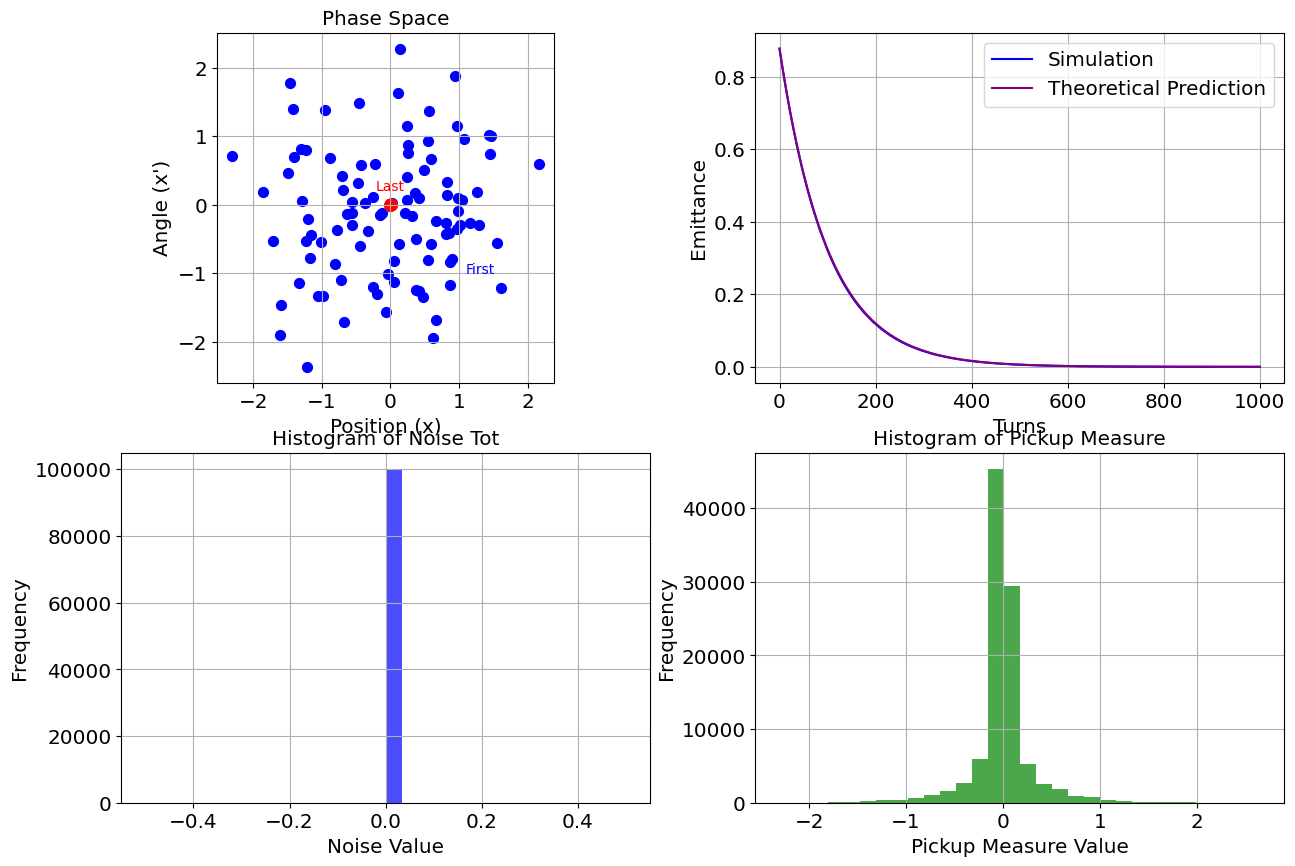

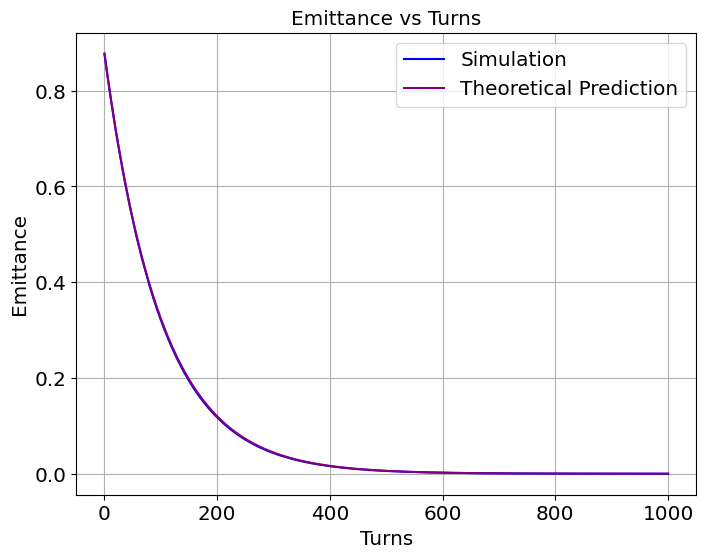

Slope of the line is: -0.005495486475316313
 exponential curvature is: -0.010050438750904736


In [10]:
Stochastic_cooling(1000,0.01, 100, 10*10**7, 5e-07, 0, 1.779*np.pi*3/2, np.pi/2)

In [57]:
def Stochastic_cooling_noise_analysis(num_turns, gain, N_particles, W, Trev, noise_levels, total_angle, position_angle):
    emittance_rms_initial_list = []
    emittance_rms_final_list = []
    
    

    # Loop over different noise levels
    for noise_std in noise_levels:
        N_part_sampl = N_particles / (2 * W * Trev)  # number of particles/sample
        number_of_samples = int(N_particles / N_part_sampl)  # number of samples
        Ts = Trev / number_of_samples
        Ns = int(N_part_sampl)
        
        x_final = np.zeros((num_turns, N_particles))
        xp_final = np.zeros((num_turns, N_particles))
        x_temp = np.zeros((number_of_samples, Ns))
        xp_temp = np.zeros((number_of_samples, Ns))
        
        x = np.random.normal(0, 1, N_particles)
        xp = np.random.normal(0, 1, N_particles)
        emittance_rms_initial = (np.mean(x**2) + np.mean(xp**2)) /2 # initial emittance
        emittance_rms_initial_list.append(emittance_rms_initial)
        X_0 = np.array([x, xp])  # initial beam's coordinates
        samples = [X_0[:, i * Ns:(i + 1) * Ns] for i in range(number_of_samples)]  # creating samples

        Mkick = np.array([[np.cos(position_angle), -np.sin(position_angle)],   # defining the machine
                          [np.sin(position_angle), np.cos(position_angle)]])
        Mremain = np.array([[np.cos(total_angle - position_angle), -np.sin(total_angle - position_angle)],
                            [np.sin(total_angle - position_angle), np.cos(total_angle - position_angle)]])
        
        for turns in range(num_turns):
            for N in range(number_of_samples):
                noise = np.random.normal(0, noise_std)
                pickup_measure = np.mean(samples[N][0, :]) + noise  # pick up measurement
                X_fin2 = Mkick @ samples[N]
                X_fin2[1, :] -= gain * pickup_measure  # kick on the kicker, based on the measurement
                X_fin = Mremain @ X_fin2
                x_temp[N] = X_fin[0, :]
                xp_temp[N] = X_fin[1, :]
                samples[N] = X_fin  # changing the position and momentum of the samples
            
            x_temp_flat = x_temp.flatten()  # flatten arrays
            xp_temp_flat = xp_temp.flatten()
            x_final[turns] = x_temp_flat
            xp_final[turns] = xp_temp_flat

            # Re-randomize the samples for mixing
            indices = np.arange(x_temp_flat.size)
            np.random.shuffle(indices)
            x_shuffled = x_temp_flat[indices].reshape(x_temp.shape)
            xp_shuffled = xp_temp_flat[indices].reshape(xp_temp.shape)
            samples = np.array(samples)
            samples[:, 0, :] = x_shuffled[:, :]
            samples[:, 1, :] = xp_shuffled[:, :]

        # Final emittance
        emittance_rms_final = ((np.mean(x_final[-1]**2) + np.mean(xp_final[-1]**2)))/2
        emittance_rms_final_list.append(emittance_rms_final)
    
    # Plot results
    plt.plot(noise_levels, emittance_rms_final_list, label='Final Emittance')
    plt.xlabel('Noise Standard Deviation')
    plt.ylabel('Final Emittance')
    plt.title('Emittance Reduction vs Noise Level')
    plt.grid(True)
    plt.show()

    # Print the initial and final emittance for each noise level
    for i, noise_std in enumerate(noise_levels):
        print(f"Noise: {noise_std:.2f}, Initial Emittance: {emittance_rms_initial_list[i]:.4f}, Final Emittance: {emittance_rms_final_list[i]:.4f}")

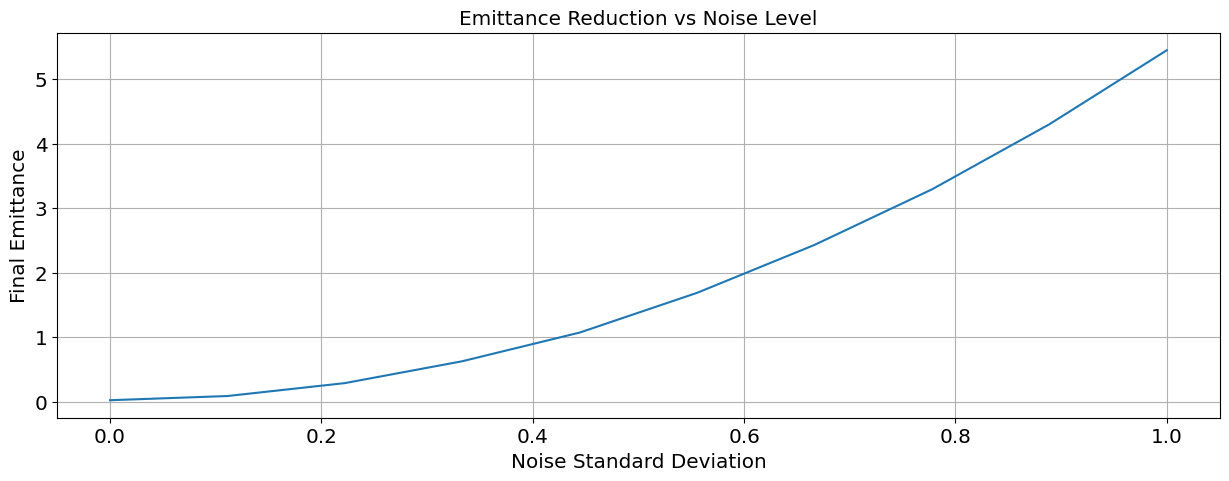

Noise: 0.00, Initial Emittance: 0.9936, Final Emittance: 0.0270
Noise: 0.11, Initial Emittance: 0.9818, Final Emittance: 0.0920
Noise: 0.22, Initial Emittance: 0.9887, Final Emittance: 0.2920
Noise: 0.33, Initial Emittance: 1.0073, Final Emittance: 0.6304
Noise: 0.44, Initial Emittance: 1.0024, Final Emittance: 1.0746
Noise: 0.56, Initial Emittance: 1.0007, Final Emittance: 1.6899
Noise: 0.67, Initial Emittance: 1.0207, Final Emittance: 2.4321
Noise: 0.78, Initial Emittance: 0.9964, Final Emittance: 3.2919
Noise: 0.89, Initial Emittance: 0.9997, Final Emittance: 4.2999
Noise: 1.00, Initial Emittance: 0.9859, Final Emittance: 5.4461


In [58]:
noise_levels = np.linspace(0, 1, 10)  # Vary noise from 0 to 1 with 10 steps
Stochastic_cooling_noise_analysis(1000,0.2, 10000, 20*10**7, 5e-07, noise_levels , 1.779*np.pi*3/2, np.pi/2)

In [59]:
import matplotlib.pyplot as plt
import numpy as np

def Stochastic_cooling_gain_analysis(num_turns, N_particles, W, Trev, noise_std, gain_levels, total_angle, position_angle):
    emittance_rms_initial_list = []
    emittance_rms_final_list = []
    
    # Loop over different gain levels
    for gain in gain_levels:
        N_part_sampl = N_particles / (2 * W * Trev)  # number of particles/sample
        number_of_samples = int(N_particles / N_part_sampl)  # number of samples
        Ts = Trev / number_of_samples
        Ns = int(N_part_sampl)
        
        x_final = np.zeros((num_turns, N_particles))
        xp_final = np.zeros((num_turns, N_particles))
        x_temp = np.zeros((number_of_samples, Ns))
        xp_temp = np.zeros((number_of_samples, Ns))
        
        x = np.random.normal(0, 1, N_particles)
        xp = np.random.normal(0, 1, N_particles)
        emittance_rms_initial = (np.mean(x**2) + np.mean(xp**2))/2 # initial emittance
        emittance_rms_initial_list.append(emittance_rms_initial)
        X_0 = np.array([x, xp])  # initial beam's coordinates
        samples = np.array([X_0[:, i * Ns:(i + 1) * Ns] for i in range(number_of_samples)])  # creating samples as an array

        Mkick = np.array([[np.cos(position_angle), -np.sin(position_angle)],   # defining the machine
                          [np.sin(position_angle), np.cos(position_angle)]])
        Mremain = np.array([[np.cos(total_angle - position_angle), -np.sin(total_angle - position_angle)],
                            [np.sin(total_angle - position_angle), np.cos(total_angle - position_angle)]])
        
        for turns in range(num_turns):
            for N in range(number_of_samples):
                noise = np.random.normal(0, noise_std)
                pickup_measure = np.mean(samples[N][0, :]) + noise  # pick up measurement
                X_fin2 = Mkick @ samples[N]
                X_fin2[1, :] -= gain * pickup_measure  # kick on the kicker, based on the measurement
                X_fin = Mremain @ X_fin2
                x_temp[N] = X_fin[0, :]
                xp_temp[N] = X_fin[1, :]
                samples[N] = X_fin  # changing the position and momentum of the samples
            
            x_temp_flat = x_temp.flatten()  # flatten arrays
            xp_temp_flat = xp_temp.flatten()
            x_final[turns] = x_temp_flat
            xp_final[turns] = xp_temp_flat

            # Re-randomize the samples for mixing
            indices = np.arange(x_temp_flat.size)
            np.random.shuffle(indices)
            x_shuffled = x_temp_flat[indices].reshape(x_temp.shape)
            xp_shuffled = xp_temp_flat[indices].reshape(xp_temp.shape)
            samples = np.array(samples)
            # Now assign the shuffled values back to samples
            samples[:, 0, :] = x_shuffled
            samples[:, 1, :] = xp_shuffled

        # Final emittance
        emittance_rms_final = ((np.mean(x_final[-1]**2) + np.mean(xp_final[-1]**2)))/2
        emittance_rms_final_list.append(emittance_rms_final)

    min_emittance = min(emittance_rms_final_list)
    optimal_gain = gain_levels[np.argmin(emittance_rms_final_list)]
    print(f"Optimal Gain: {optimal_gain}, Min Emittance: {min_emittance}")

    # Plot results
    plt.plot(gain_levels, emittance_rms_final_list, label='Final Emittance')
    plt.xlabel('Gain')
    plt.ylabel('Final Emittance')
    plt.title('Emittance Reduction vs Gain')
    plt.grid(True)
    plt.show()


Optimal Gain: 0.22, Min Emittance: 0.07922405944096264


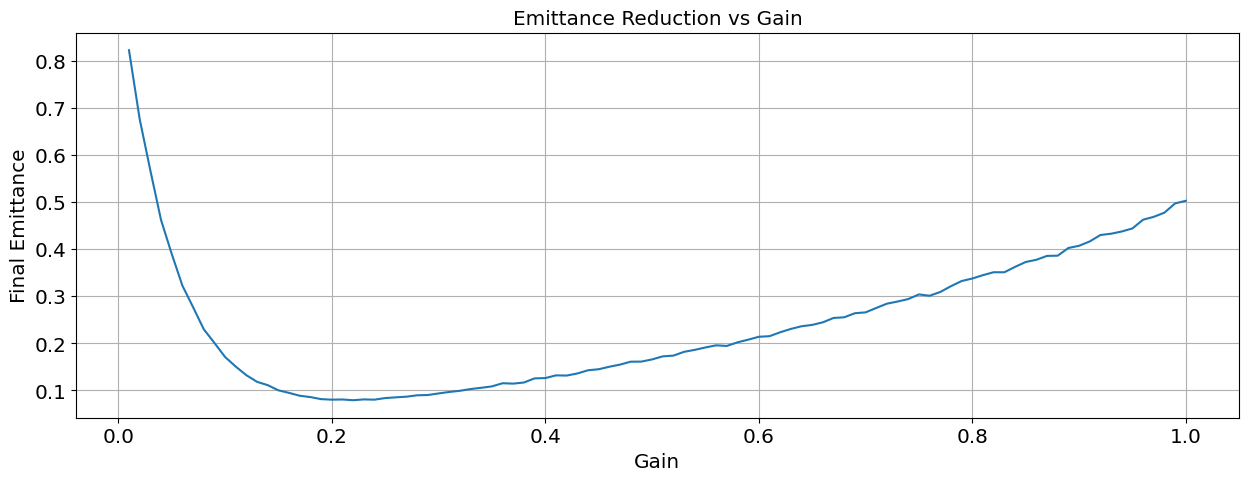

In [76]:
gain_levels = np.linspace(0.01, 1.0, 100)  # Vary gain from 0.01 to 1.0 with 100 steps

Stochastic_cooling_gain_analysis( 1000, 10000, 20*10**7, 5e-07, 0.1 , gain_levels, 1.779*np.pi*3/2, np.pi/2)  # Vary noise from 0 to 1 with 10 steps


In [6]:
def Stochastic_cooling_3D_analysis(num_turns, N_particles, W, Trev, noise_levels, gain_levels, total_angle, position_angle):
    noise_grid, gain_grid = np.meshgrid(noise_levels, gain_levels)
    emittance_rms_initial_list = []
    emittance_rms_final_grid = np.zeros_like(noise_grid)
    
    # Loop over different noise levels and gain values
    for i, gain in enumerate(gain_levels):
        for j, noise_std in enumerate(noise_levels):
            N_part_sampl = N_particles / (2 * W * Trev)  # number of particles/sample
            number_of_samples = int(N_particles / N_part_sampl)  # number of samples
            Ts = Trev / number_of_samples
            Ns = int(N_part_sampl)
            
            x_final = np.zeros((num_turns, N_particles))
            xp_final = np.zeros((num_turns, N_particles))
            x_temp = np.zeros((number_of_samples, Ns))
            xp_temp = np.zeros((number_of_samples, Ns))
            
            x = np.random.normal(0, 1, N_particles)
            xp = np.random.normal(0, 1, N_particles)
            emittance_rms_initial = (np.mean(x**2) + np.mean(xp**2))  # initial emittance
            
            if j == 0:  # Append the initial emittance once
                emittance_rms_initial_list.append(emittance_rms_initial)
                
            X_0 = np.array([x, xp])  # initial beam's coordinates
            samples = [X_0[:, i * Ns:(i + 1) * Ns] for i in range(number_of_samples)]  # creating samples

            Mkick = np.array([[np.cos(position_angle), -np.sin(position_angle)],   # defining the machine
                              [np.sin(position_angle), np.cos(position_angle)]])
            Mremain = np.array([[np.cos(total_angle - position_angle), -np.sin(total_angle - position_angle)],
                                [np.sin(total_angle - position_angle), np.cos(total_angle - position_angle)]])
            
            for turns in range(num_turns):
                for N in range(number_of_samples):
                    noise = np.random.normal(0, noise_std)
                    pickup_measure = np.mean(samples[N][0, :]) + noise  # pick up measurement
                    X_fin2 = Mkick @ samples[N]
                    X_fin2[1, :] -= gain * pickup_measure  # kick on the kicker, based on the measurement
                    X_fin = Mremain @ X_fin2
                    x_temp[N] = X_fin[0, :]
                    xp_temp[N] = X_fin[1, :]
                    samples[N] = X_fin  # changing the position and momentum of the samples
                
                x_temp_flat = x_temp.flatten()  # flatten arrays
                xp_temp_flat = xp_temp.flatten()
                x_final[turns] = x_temp_flat
                xp_final[turns] = xp_temp_flat

                # Re-randomize the samples for mixing
                indices = np.arange(x_temp_flat.size)
                np.random.shuffle(indices)
                x_shuffled = x_temp_flat[indices].reshape(x_temp.shape)
                xp_shuffled = xp_temp_flat[indices].reshape(xp_temp.shape)
                samples = np.array(samples)
                samples[:, 0, :] = x_shuffled[:, :]
                samples[:, 1, :] = xp_shuffled[:, :]

            # Final emittance
            emittance_rms_final = (np.mean(x_final[-1]**2) + np.mean(xp_final[-1]**2))
            emittance_rms_final_grid[i, j] = emittance_rms_final
    
    min_index = np.unravel_index(np.argmin(emittance_rms_final_grid), emittance_rms_final_grid.shape)
    min_noise = noise_levels[min_index[1]]
    min_gain = gain_levels[min_index[0]]
    min_emittance = emittance_rms_final_grid[min_index]

    print(f"Minimum Emittance: {min_emittance:.4f} at Noise: {min_noise:.4f} and Gain: {min_gain:.4f}")
    # Plot results
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Create a surface plot for emittance based on noise and gain
    ax.plot_surface(noise_grid, gain_grid, emittance_rms_final_grid, cmap='viridis')

    ax.set_xlabel('Noise Standard Deviation')
    ax.set_ylabel('Gain')
    ax.set_zlabel('Final Emittance')
    ax.set_title('Emittance Reduction vs Noise and Gain')
    plt.show()

    # Print the initial and final emittance for each combination of noise and gain
    for i, gain in enumerate(gain_levels):
        for j, noise_std in enumerate(noise_levels):
            print(f"Noise: {noise_std:.2f}, Gain: {gain:.2f}, Initial Emittance: {emittance_rms_initial_list[0]:.4f}, Final Emittance: {emittance_rms_final_grid[i, j]:.4f}")

Minimum Emittance: 0.0126 at Noise: 0.0000 and Gain: 0.2971


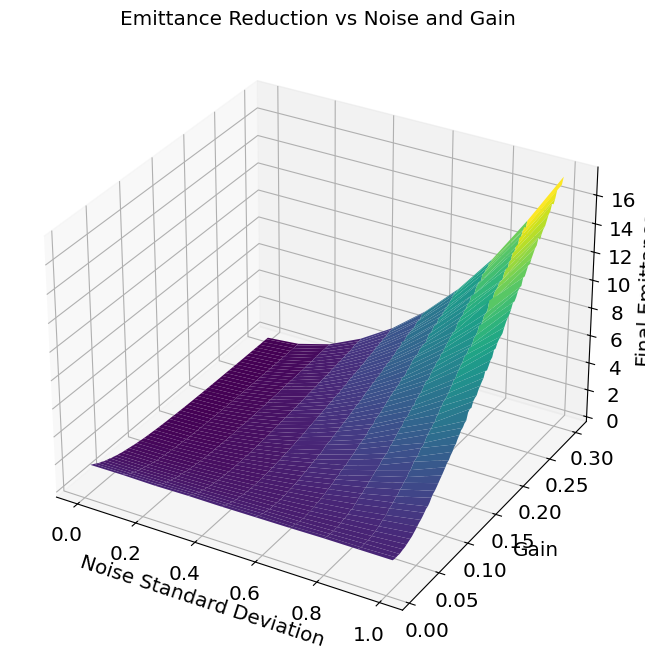

Noise: 0.00, Gain: 0.01, Initial Emittance: 2.0045, Final Emittance: 1.6449
Noise: 0.11, Gain: 0.01, Initial Emittance: 2.0045, Final Emittance: 1.6619
Noise: 0.22, Gain: 0.01, Initial Emittance: 2.0045, Final Emittance: 1.6287
Noise: 0.33, Gain: 0.01, Initial Emittance: 2.0045, Final Emittance: 1.6647
Noise: 0.44, Gain: 0.01, Initial Emittance: 2.0045, Final Emittance: 1.6543
Noise: 0.56, Gain: 0.01, Initial Emittance: 2.0045, Final Emittance: 1.6739
Noise: 0.67, Gain: 0.01, Initial Emittance: 2.0045, Final Emittance: 1.6931
Noise: 0.78, Gain: 0.01, Initial Emittance: 2.0045, Final Emittance: 1.7280
Noise: 0.89, Gain: 0.01, Initial Emittance: 2.0045, Final Emittance: 1.7288
Noise: 1.00, Gain: 0.01, Initial Emittance: 2.0045, Final Emittance: 1.7316
Noise: 0.00, Gain: 0.01, Initial Emittance: 2.0045, Final Emittance: 1.5590
Noise: 0.11, Gain: 0.01, Initial Emittance: 2.0045, Final Emittance: 1.5590
Noise: 0.22, Gain: 0.01, Initial Emittance: 2.0045, Final Emittance: 1.5770
Noise: 0.33,

In [8]:
noise_levels = np.linspace(0, 1, 10)  # Vary noise from 0 to 1 with 10 steps
gain_levels = np.linspace(0.01, 0.3, 100)
Stochastic_cooling_3D_analysis(1000, 10000, 20*10**7, 5e-07, noise_levels, gain_levels, 1.779*np.pi*3/2, np.pi/2)

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def Stochastic_cooling_3D_analysis(num_turns, N_particles, W, Trev, noise_levels, gain_levels, total_angle, position_angle):
    noise_grid, gain_grid = np.meshgrid(noise_levels, gain_levels)
    emittance_rms_initial_list = []
    emittance_rms_final_grid = np.zeros_like(noise_grid)
    
    # Loop over different noise levels and gain values
    for i, gain in enumerate(gain_levels):
        for j, noise_std in enumerate(noise_levels):
            N_part_sampl = N_particles / (2 * W * Trev)  # number of particles/sample
            number_of_samples = int(N_particles / N_part_sampl)  # number of samples
            Ts = Trev / number_of_samples
            Ns = int(N_part_sampl)
            
            x_final = np.zeros((num_turns, N_particles))
            xp_final = np.zeros((num_turns, N_particles))
            x_temp = np.zeros((number_of_samples, Ns))
            xp_temp = np.zeros((number_of_samples, Ns))
            
            x = np.random.normal(0, 1, N_particles)
            xp = np.random.normal(0, 1, N_particles)
            emittance_rms_initial = (np.mean(x**2) + np.mean(xp**2))/2  # initial emittance
            
            if j == 0:  # Append the initial emittance once
                emittance_rms_initial_list.append(emittance_rms_initial)
                
            X_0 = np.array([x, xp])  # initial beam's coordinates
            samples = [X_0[:, i * Ns:(i + 1) * Ns] for i in range(number_of_samples)]  # creating samples

            Mkick = np.array([[np.cos(position_angle), -np.sin(position_angle)],   # defining the machine
                              [np.sin(position_angle), np.cos(position_angle)]])
            Mremain = np.array([[np.cos(total_angle - position_angle), -np.sin(total_angle - position_angle)],
                                [np.sin(total_angle - position_angle), np.cos(total_angle - position_angle)]])
            
            for turns in range(num_turns):
                for N in range(number_of_samples):
                    noise = np.random.normal(0, noise_std)
                    pickup_measure = np.mean(samples[N][0, :]) + noise  # pick up measurement
                    X_fin2 = Mkick @ samples[N]
                    X_fin2[1, :] -= gain * pickup_measure  # kick on the kicker, based on the measurement
                    X_fin = Mremain @ X_fin2
                    x_temp[N] = X_fin[0, :]
                    xp_temp[N] = X_fin[1, :]
                    samples[N] = X_fin  # changing the position and momentum of the samples
                
                x_temp_flat = x_temp.flatten()  # flatten arrays
                xp_temp_flat = xp_temp.flatten()
                x_final[turns] = x_temp_flat
                xp_final[turns] = xp_temp_flat

                # Re-randomize the samples for mixing
                indices = np.arange(x_temp_flat.size)
                np.random.shuffle(indices)
                x_shuffled = x_temp_flat[indices].reshape(x_temp.shape)
                xp_shuffled = xp_temp_flat[indices].reshape(xp_temp.shape)
                samples = np.array(samples)
                samples[:, 0, :] = x_shuffled[:, :]
                samples[:, 1, :] = xp_shuffled[:, :]

            # Final emittance
            emittance_rms_final = ((np.mean(x_final[-1]**2) + np.mean(xp_final[-1]**2)))/2
            emittance_rms_final_grid[i, j] = emittance_rms_final
    
    # Find minimum emittance
    min_index = np.unravel_index(np.argmin(emittance_rms_final_grid), emittance_rms_final_grid.shape)
    min_noise = noise_levels[min_index[1]]
    min_gain = gain_levels[min_index[0]]
    min_emittance = emittance_rms_final_grid[min_index]

    print(f"Minimum Emittance: {min_emittance:.4f} at Noise: {min_noise:.4f} and Gain: {min_gain:.4f}")
    
    # Plot the colormap
    plt.figure(figsize=(10, 8))
    plt.imshow(emittance_rms_final_grid, origin='lower', aspect='auto', cmap='viridis', 
               extent=[noise_levels[0], noise_levels[-1], gain_levels[0], gain_levels[-1]])
    
    plt.colorbar(label='Final Emittance')
    plt.xlabel('Noise Standard Deviation')
    plt.ylabel('Gain')
    plt.title('Emittance Reduction vs Noise and Gain')
    plt.show()

    # Print the initial and final emittance for each combination of noise and gain
    for i, gain in enumerate(gain_levels):
        for j, noise_std in enumerate(noise_levels):
            print(f"Noise: {noise_std:.2f}, Gain: {gain:.2f}, Initial Emittance: {emittance_rms_initial_list[0]:.4f}, Final Emittance: {emittance_rms_final_grid[i, j]:.4f}")

Minimum Emittance: 0.0057 at Noise: 0.0000 and Gain: 0.3000


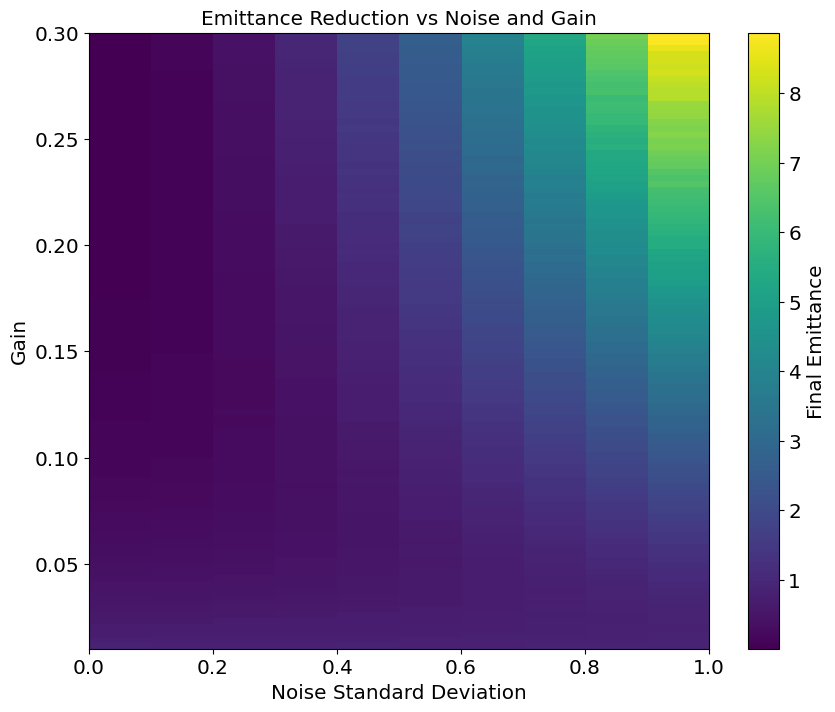

Noise: 0.00, Gain: 0.01, Initial Emittance: 1.0231, Final Emittance: 0.8395
Noise: 0.11, Gain: 0.01, Initial Emittance: 1.0231, Final Emittance: 0.8141
Noise: 0.22, Gain: 0.01, Initial Emittance: 1.0231, Final Emittance: 0.8171
Noise: 0.33, Gain: 0.01, Initial Emittance: 1.0231, Final Emittance: 0.8178
Noise: 0.44, Gain: 0.01, Initial Emittance: 1.0231, Final Emittance: 0.8392
Noise: 0.56, Gain: 0.01, Initial Emittance: 1.0231, Final Emittance: 0.8283
Noise: 0.67, Gain: 0.01, Initial Emittance: 1.0231, Final Emittance: 0.8266
Noise: 0.78, Gain: 0.01, Initial Emittance: 1.0231, Final Emittance: 0.8627
Noise: 0.89, Gain: 0.01, Initial Emittance: 1.0231, Final Emittance: 0.8542
Noise: 1.00, Gain: 0.01, Initial Emittance: 1.0231, Final Emittance: 0.8586
Noise: 0.00, Gain: 0.01, Initial Emittance: 1.0231, Final Emittance: 0.7691
Noise: 0.11, Gain: 0.01, Initial Emittance: 1.0231, Final Emittance: 0.7787
Noise: 0.22, Gain: 0.01, Initial Emittance: 1.0231, Final Emittance: 0.7928
Noise: 0.33,

In [55]:
noise_levels = np.linspace(0, 1, 10)  # Vary noise from 0 to 1 with 10 steps
gain_levels = np.linspace(0.01, 0.3, 100)
Stochastic_cooling_3D_analysis(1000, 10000, 20*10**7, 5e-07, noise_levels, gain_levels, 1.779*np.pi*3/2, np.pi/2)

In [9]:
from mpl_toolkits.mplot3d import Axes3D
W=20*10**7
Trev=5e-7
N=10000
gain=0.2
U=0.1*50
CR=2*(W/N)*(2*gain-(gain**2)*(1+U))
print(f'cooling rate is:', CR)

cooling rate is: 6399.999999999999


In [5]:
S=np.array([[2,3,4],[5,6,7]])
print(S.shape)
S=S.flatten()
print(S)

(2, 3)
[2 3 4 5 6 7]
